In [1]:
# /// script
# requires-python = ">=3.13"
# dependencies = [
#     "numpy",
#     "pylatexenc",
#     "qiskit",
#     "surfq",
# ]
# ///

# SurfQ: A Surface Code Stabilizer Simulation Tutorial
---

## Quantum Error Correction

Quantum Error Correction (QEC) has become **indisputably essential** to the future of quantum computing. Because we cannot develop perfect physical systems, physical errors are unavoidable in quantum hardware.  

At first glance, this may appear to impose a fundamental barrier to quantum computation: errors are not limited to simple definite bit-flips, and measuring a quantum state to check for errors typically disturbs the state itself.

Fortunately, pioneers such as **Peter Shor**, **Daniel Gottesman**, **Alexei Kitaev**, and more, made tremendous strides in the early days of the field. They demonstrated how **quantum error-correcting codes** can be used to correct errors effectively without disturbing the logical computation. 

These approaches encode quantum information **redundantly across multiple physical qubits** so errors can be detected and corrected *indirectly*, preserving the integrity of computations and enabling **large-scale, fault-tolerant quantum computing**.

### Repetition Code

The **repetition code** is a simple quantum error code capable of correcting bit flips.

We define logical 0 and 1 as
$$
\ket{\bar{0}} = \ket{000}, \quad \ket{\bar{1}} = \ket{111},
$$
and thus any logical state is defined as
$$
\ket{\bar{\psi}} = \alpha \ket{\bar{0}}+ \beta \ket{\bar{1}} = \alpha \ket{000}+ \beta \ket{111}, \quad |\alpha|^2 + |\beta|^2 = 1.
$$

To encode any state $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ into $\ket{\bar{\psi}}$ it suffices to  
$$
\ket{\psi}_0 \otimes \ket{0}_1 \otimes \ket{0}_2 \xrightarrow{\mathrm{CX}_{0 \rightarrow 1,2}} \ket{\bar{\psi}}.
$$

To detect errors, we use two **ancilla qubits** to measure the parity between neighbouring code qubits. Let ancilla $a_1$ measure the parity of qubits 0 and 1, and $a_2$ measure qubits 1 and 2. Each parity measurement consists of two CX gates where the data qubits $q_i, q_j$ are the controls and the ancilla $a_k$ is the target.
$$
\ket{q_0 q_1 q_2}\otimes \ket{0}_{a_1}\otimes \ket{0}_{a_2} 
\xrightarrow{\text{parity check}} 
\ket{q_0 q_1 q_2}\otimes \ket{q_0 \oplus q_1}_{a_1} \otimes \ket{q_1 \oplus q_2}_{a_2}.
$$ 

We now depict the circuit, whose first block encodes the logical state, and whose second and third blocks measure for detecting $X$ errors:

<img src="figures/repetition_code.png" style="display:block;margin:auto" width="800"/>

More concretely, if between the encoding and the error syndrome measurement:

- no error occurs, our parity measurement yields $\ket{00}_{a}$.  
- a bit flip occurs on qubit 0:  
  $\alpha \ket{000}+ \beta \ket{111} \xrightarrow{X_0} \alpha \ket{100} + \beta  \ket{011}$,  
  we then obtain parity measurement $\ket{10}_{a}$.
- a bit flip occurs on qubit 2:  
  $\alpha \ket{000}+ \beta \ket{111} \xrightarrow{X_2} \alpha \ket{001} + \beta  \ket{110}$,  
  we then obtain parity measurement $\ket{01}_{a}$.  
- a bit flip occurs on qubit 1:  
  $\alpha \ket{000}+ \beta \ket{111} \xrightarrow{X_1} \alpha \ket{010} + \beta  \ket{101}$,  
  we then obtain parity measurement $\ket{11}_{a}$.

The ancilla outcomes uniquely identify the flipped qubit, allowing for targeted correction with an $X$ gate.

### Measuring the Z operator

For each qubit we have been performing simple **controlled-NOT gates** and then measuring the target qubit to check whether a bit had been flipped.

<img src="figures/cx.png" style="display:block;margin:auto" width="300"/>

In other words, we have been checking whether each qubit is an eigenstate $+1$ or $-1$ of the **$Z$ operator**.  
This is nothing else other than a **projective measurement** of the $Z$ operator, which can be depicted as follows:

<img src="figures/projective_Z.png" style="display:block;margin:auto" width="500"/>

In general, any operator $U$ can be measured via the same process. The target qubit ends up projected onto an eigenvector of $U$ upon measuring the ancilla qubit. 

Thus we can now depict the **repetition code circuit** as follows:

<img src="figures/repetition_code_proj.png" style="display:block;margin:auto" width="1500"/>


### The Stabilizer Formalism

We now introduce the stabilizer formalism and explain the magic behind the capability of detecting errors via **projective measurements** of the $Z$ operator. 

A **stabilizer** of a quantum state $\ket{\psi}$ is an operator $S$, such that  
$$
S \ket{\psi} = \ket{\psi}.
$$
In other words $\ket{\psi}$ is a $+1$ eigenstate of the operator $S$.

Furthermore, stabilizers are chosen from the Pauli group $\mathcal{P}_n$ because they are Hermitian, square to identity, and either commute or anticommute. This ensures that projective measurements yield **binary syndromes** and that errors can be detected in a structured and predictable way.

All unwanted environmental interactions affecting a codeword can be expressed as a **linear combination of Pauli operators**:
$$
E = \sum_{P \in \mathcal{P}_n} \alpha_P \, P,
$$
where each $P$ is an $n$-qubit Pauli operator and $\alpha_P \in \mathbb{C}$.

The key insight is that stabilizer codes only need to consider **Pauli errors**:

1. By linearity, any error operator $E$ can be decomposed into Pauli terms.  
2. Each Pauli term either **commutes** or **anticommutes** with each stabilizer.  
3. Measuring the stabilizers projects the state onto an eigenbasis of the stabilizers, revealing the **error syndrome** for each term independently.  

Consequently, any arbitrary error $E$ can be corrected by addressing the individual Pauli components indicated by the syndromes. This is what makes the stabilizer formalism both **powerful and efficient**: it reduces the problem of detecting arbitrary errors to detecting a finite set of Pauli operators.

### The Repetition Code Stabilizers

For the repetition code, one may then infer that $\ket{\bar{\psi}} = \alpha \ket{000}+ \beta \ket{111}$ has stabilizers $ZZI$, $IZZ$ and $ZIZ$, since  
$$
ZZI \ket{\bar{\psi}} = IZZ \ket{\bar{\psi}} = ZIZ \ket{\bar{\psi}} = \ket{\bar{\psi}}.
$$

Hence, measuring stabilizers does not alter the state $\ket{\psi}$.

<img src="figures/repetition_code_stab.png" style="display:block;margin:auto" width="1000"/>

*Note: From here onwards we depict operators such as $ZZI$ as $Z_0 Z_1$ instead, where the omission of an operator for a given qubit index implies the identity operator $I$ on said qubit.*

We now consider an **erroneous state** $\ket{\bar{\psi}^{\prime}} = X_0 \ket{\bar{\psi}}$ and how stabilizers act on the state. 

$$
Z_0Z_1 \ket{\bar{\psi}^{\prime}} = Z_0Z_1X_0 \ket{\bar{\psi}} = - X_0Z_0Z_1 \ket{\bar{\psi}} = - X_0 \ket{\bar{\psi}} = - \ket{\bar{\psi}^{\prime}} 
$$

$$
Z_1Z_2 \ket{\bar{\psi}^{\prime}} = Z_1Z_2X_0 \ket{\bar{\psi}} = X_0Z_1Z_2 \ket{\bar{\psi}} = X_0 \ket{\bar{\psi}} = \ket{\bar{\psi}^{\prime}} 
$$

We thus observe, our stabilizers will **anticommute** with our $X$ errors, projecting our state into a $-1$ eigenstate of one or more stabilizers upon measuring, thus fully identifying the error and allowing us to correct it.      

If above you raised an eyebrow about the fact that $Z_0Z_2$ was also a stabilizer, and yet we never measured it for the repetition code, it should now become straightforward.  
Since $Z_0Z_1 \cdot Z_1Z_2 = Z_0Z_2$, measuring $Z_0Z_2$ provides no more information than measuring both $Z_0Z_1$ and $Z_1Z_2$ provide.

*Note: In general, to fully specify a logical state of a code encoding $k$ logical qubits and using a total of $n$ physical qubits, it suffices to use $n - k$ independent stabilizers. In the case of the repetition code, we encode $k=1$ logical qubit using $n=3$ qubits, thus one only requires $n-k=2$ independent stabilizers.*

### Logical Operators

We define the codespace $\mathcal{C}$ of our code as the set of all states that are stabilized by all elements of the stabilizer group $S$, that is,
$$
\mathcal{C} = \{ \, \ket{\psi} \in (\mathbb{C}^2)^{\otimes n} \mid g \ket{\psi} = \ket{\psi}, \ \forall g \in S \, \},
$$
so that all states in $\mathcal{C}$ commute with the stabilizers and have no detectable errors.

We call a **generator** any independent element $g \in S$ such that the stabilizer group $S$ is fully generated as $S = \langle g_1, \dots, g_{n-k} \rangle$. Stabilizers are independent if no stabilizer can be written as a product of the others (up to a phase).

Consequently, any **detectable error** $E$ must anticommute with at least one generator in $S = \langle g_1, \dots, g_{n-k} \rangle$, that is
$$
\exists\, i \quad \text{such that} \quad \{E, g_i\} = 0.
$$

So, what does one call an operator $L$ that is not in $S$ but commutes with all stabilizers $g \in S$?
Granted that $L$ is not a stabilizer and thus alters the state, but produces no error syndrome, as it commutes with all stabilizers, $L$ is a **logical operator**. When unintended, $L$ is then a **logical error**.  

For the repetition code, one may observe that $X_0X_1X_2$ commutes with all stabilizers, and that  
$$
X_0X_1X_2 \ket{\bar{\psi}} = X_0X_1X_2 (\alpha \ket{000}+ \beta \ket{111}) = \beta \ket{000}+ \alpha \ket{111}.
$$

One may also notice that $Z_0Z_1Z_2$ commutes with all stabilizers, and that  
$$
Z_0Z_1Z_2 \ket{\bar{\psi}} = Z_0Z_1Z_2 (\alpha \ket{000}+ \beta \ket{111}) = \alpha \ket{000} - \beta \ket{111}.
$$

Given that $X_0X_1X_2$ and $Z_0Z_1Z_2$ anticommute and both are logical operators, both behave effectively as logical **$\bar{X}$** and **$\bar{Z}$** operators.

Note that any single-qubit $Z$ operator would be equivalent to $Z_0Z_1Z_2$, as it would produce the same effect on the state. Not only that, but logical operators are all **equivalent up to stabilizer multiplication**. In this case, one obtains a weight-1 **$\bar{Z}$** by multiplying $Z_0Z_1Z_2$ by any stabilizer $g \in S$.

We leave as an exercise to the reader to understand if $X_0Y_1Y_2$ is either a detectable error, a stabilizer or a logical operator and if so which. 

### Code Distance

We can now define the **distance** of a code as the minimum amount of physical qubit errors to produce an undetectable error. It's easy to see this definition is equivalent to saying the distance of a code is equal to the minimum-weight of its logical operators.

Furthermore, for a code with distance $d$:
- We can **detect** any error with weight up to $d-1$ 
- We can **correct** any error with weight up to $\left\lfloor(d-1)/2\right\rfloor$

We then classify codes as **$[n,k,d]$**:
- $n$: Number of physical qubits used
- $k$: Number of logical qubits encoded
- $d$: Distance of the code

With respect to $X$ errors only, the 3-qubit repetition code is a **$[3,1,3]$** code. But in general, considering $Z$ errors too, it's **$[3,1,1]$**.

---


## Simulation of Stabilizer States 

A **stabilizer state** is a quantum state that can be described as the unique joint $+1$ eigenstate of an abelian subgroup of the Pauli group.

On $n$ qubits, a stabilizer state is the unique state $\ket{\psi}$ stabilized by a **maximal stabilizer subgroup** of size $2^n$.  

In other words,  
$$
g\ket{\psi} = \ket{\psi}, \quad \forall g \in S,
$$  
where $S$ has $n$ independent generators. The state is therefore fully specified by these $n$ generators.

An example of a non-stabilizer state is the magic state  
$$
\ket{T} = \frac{\ket{0} + e^{i \pi / 4}\ket{1}}{\sqrt{2}}.
$$
**Note:** In your original you wrote `/2`, which is incorrect; the correct normalization factor is $\sqrt{2}$.  

---

### Tracking Evolution
In analogy with the Heisenberg picture, it is sufficient to track how the **stabilizers** evolve under operations, rather than evolving the state vector itself.  

Under Clifford operators, the Pauli operators transform as:  
$$
\begin{aligned}
H: &\quad X \mapsto Z, \quad Z \mapsto X, \quad Y \mapsto -Y \\[2mm]
S: &\quad X \mapsto Y, \quad Z \mapsto Z, \quad Y \mapsto -X \\[2mm]
\mathrm{CX}: &\quad 
X_c \otimes I_t \mapsto X_c \otimes X_t, \quad 
Z_c \otimes I_t \mapsto Z_c \otimes I_t,\\ 
&\quad I_c \otimes X_t \mapsto I_c \otimes X_t, \quad 
I_c \otimes Z_t \mapsto Z_c \otimes Z_t
\end{aligned}
$$  

Thus, any Clifford circuit can be simulated by updating stabilizers according to these rules.  

---

### Efficient Representation

To efficiently represent stabilizers, we use the **Binary Symplectic Form**, where Pauli operators are represented as binary vectors:
$$
I = (0|0), \quad
X = (1|0), \quad
Z = (0|1), \quad
Y = (1|1)
$$ 

For an $n$-qubit stabilizer, we use $2n$ bits: the first $n$ bits encode the presence of $X$ on each qubit, the second $n$ bits encode $Z$.  

**Example:** The 3-qubit repetition code stabilizers  
$$
Z_0 Z_1 = (000|110), \quad Z_1 Z_2 = (000|011)
$$

Stabilizer multiplication is then just **bitwise XOR** of the vectors, e.g.  
$$
Z_0 X_2 \cdot Y_0 Z_1 X_2 = (001|100) \oplus (101|110) = (100|010) = X_0 Z_1
$$

Each stabilizer requires $2n$ bits plus **one additional bit for the phase**. With $n$ independent generators, a stabilizer state requires  
$$
n(2n + 1) = O(n^2)
$$  
binary entries, compared to the state vector which grows as $O(2^n)$.

The **stabilizer tableau** collects the generators and their phases in a matrix form:  
$$
\mathcal{T} =
\begin{bmatrix}
 x_{1,1} & \dots & x_{1,n} & z_{1,1} & \dots & z_{1,n} & r_1 \\
 x_{2,1} & \dots & x_{2,n} & z_{2,1} & \dots & z_{2,n} & r_2 \\
 \vdots & \ddots & \vdots & \vdots & \ddots & \vdots & \vdots \\
 x_{n,1} & \dots & x_{n,n} & z_{n,1} & \dots & z_{n,n} & r_n
\end{bmatrix}
$$

Following the evolution of Pauli operators under Clifford gates described above, the stabilizer tableau can be updated according to the following rules:

- **Phase (S) on qubit $a$:** For all $i \in \{1,\dots,2n\}$, update  
$$
r_i := r_i \oplus x_{ia} z_{ia}, \quad z_{ia} := z_{ia} \oplus x_{ia}.
$$

- **Hadamard on qubit $a$:** For all $i$, update  
$$
r_i := r_i \oplus x_{ia} z_{ia},
$$  
then **swap** $x_{ia}$ and $z_{ia}$.

- **CX from control $a$ to target $b$:** For all $i$, update  
$$
\begin{aligned}
r_i &:= r_i \oplus x_{ia} z_{ib} (x_{ib} \oplus z_{ia} \oplus 1),\\
x_{ib} &:= x_{ib} \oplus x_{ia},\\
z_{ia} &:= z_{ia} \oplus z_{ib}.
\end{aligned}

Each Clifford operation updates a single stabilizer in $O(1)$ time. Updating all $n$ stabilizers therefore takes $O(n)$ time, a dramatic improvement over the $O(2^n)$ cost of evolving the full state vector.

---

For further information, see Aaronson & Gottesman, *Improved Simulation of Stabilizer Circuits*, arXiv:quant-ph/0406196 (2004). [Link](https://arxiv.org/abs/quant-ph/0406196)

*Note:* In the paper, $n$ additional **destabilizer** generators are stored to reduce measurement complexity from $O(n^3)$ to $O(n^2)$. For simulating quantum error-correcting codes without arbitrary measurements, this detail can be safely neglected.

---


## The Surface Code

We focus on the **rotated surface code**, which uses fewer qubits for the same code distance and is standard in modern implementations.

Qubits sit on the **vertices** of a $L \times L$ square lattice. Stabiliser generators live on **faces**, arranged in a checkerboard:

- **X-type stabilisers** $A_f$ act with $X$ on all qubits at the corners of a face (4 in the bulk, 2 at boundaries):

$$
A_f = \prod_{i \in f} X_i
$$

- **Z-type stabilisers** $B_f$ act with $Z$ on all qubits at the corners of a face (4 in the bulk, 2 at boundaries):

$$
B_f = \prod_{i \in f} Z_i
$$

Faces hosting X- and Z-stabilisers alternate in a checkerboard pattern. Boundary stabilisers automatically involve fewer qubits to close the lattice.

Specifying the X- and Z-type stabilisers of the rotated surface code is sufficient to fully define the code. However, it might be a little contrived to visualize it. 
For that purpose we introduce ***surfq***, a python package for simulatnig and visualizing the rotated surface code.

We start by importing the ***Lattice*** class.

In [1]:
from surfq import Lattice

We can then define a rotated surface code on a lattice of any odd size $L$, where $L$ specifies the number of qubits along one dimensino of the square lattice

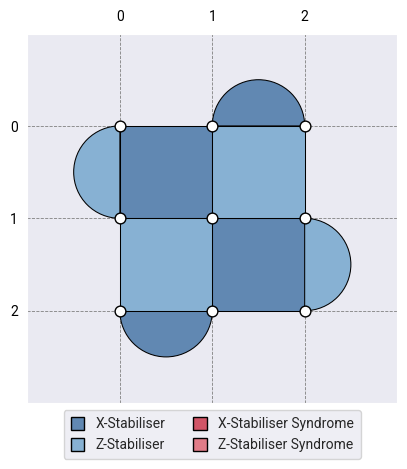

In [2]:
lattice = Lattice(3)
lattice.show()

In the example above, we initialise a $3 \times 3$ lattice. Each white dot represents a physical qubit. The lattice contains full faces in the bulk, each acting as a 4-qubit stabiliser, and half-faces on the boundaries, each acting as a 2-qubit stabiliser. We perform projective measurements of each stabiliser on the qubits it touches. It can also be helpful to imagine an additional ancilla qubit at the center of each stabiliser, which does not store logical information but is used solely for performing the measurement.

For futher reference, we now depict a $5 \times 5$ lattice. 

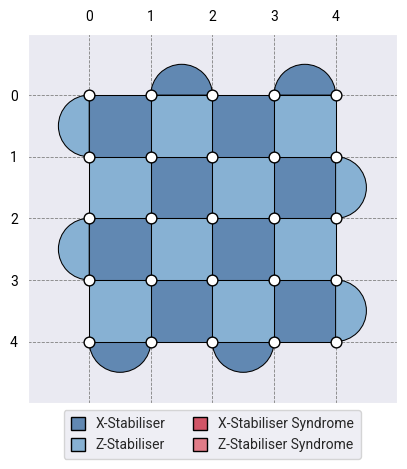

In [5]:
lattice = Lattice(5)
lattice.show()

To keep track of the surface code encoded state, we leverage the stabilizer tableau. This is stored in the *Lattice* object as such: 

In [8]:
L = 3
lattice = Lattice(L)
lattice.tableau

array([[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]],
      dtype=uint8)

We now take a closer look at the X-stabilizers and Z-stabilizers:

In [18]:
X_stabilizers = lattice.tableau[:(lattice.n-1)//2, :lattice.n]
Z_stabilizers = lattice.tableau[(lattice.n-1)//2:, lattice.n:-1]

print(f"X Stabilizers:\n {X_stabilizers}\n")
print(f"Z Stabilizers:\n {Z_stabilizers}")

X Stabilizers:
 [[1 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 1]
 [0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0]]

Z Stabilizers:
 [[0 1 1 0 1 1 0 0 0]
 [0 0 0 1 1 0 1 1 0]
 [1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1]]


We may also note that all stabiliser eigenvalues are currently set to $+1$, meaning the state lies in the +1 eigenspace of each stabiliser generator, and is thus within the codespace $\mathcal{C}$, free of any detectable errors.

In [20]:
print(f"Current Sydnrome Measurements: {lattice.tableau[:,-1]}")

Current Sydnrome Measurements: [0 0 0 0 0 0 0 0]


One may operate on the lattice with the standard Clifford gates $S$, $H$ and $CX$. To operate on the lattice, one must first index the lattice. This yields a ***LatticeView*** object, that is, a view of the latex with a subset of qubits to perform operations on. Take the following example:

In [33]:
lattice = Lattice(3)
print(f"Before Hadamard: \n \
    \tX-stabilizer: {lattice.tableau[0]}  \n \
    \tZ-stabilizer: {lattice.tableau[(lattice.n-1)//2]}  \n \
")
lattice[1].H()
print(f"After Hadamard: \n \
    \tX-stabilizer: {lattice.tableau[0]}  \n \
    \tZ-stabilizer: {lattice.tableau[(lattice.n-1)//2]}  \n \
")

Before Hadamard: 
     	X-stabilizer: [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  
     	Z-stabilizer: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0]  
 
After Hadamard: 
     	X-stabilizer: [1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]  
     	Z-stabilizer: [0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]  
 


One can observe the bit exchange between $x_{i,1}$ and $z_{i,1}$, across all stabilizers.

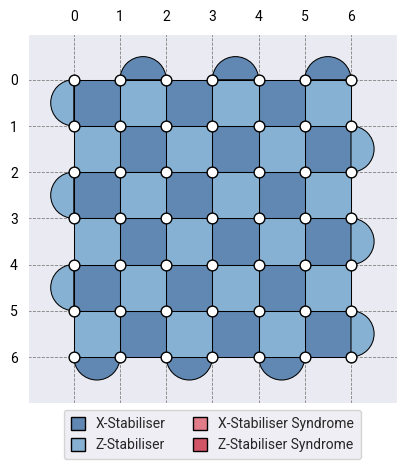

In [21]:
lattice = Lattice(7)
lattice.show()

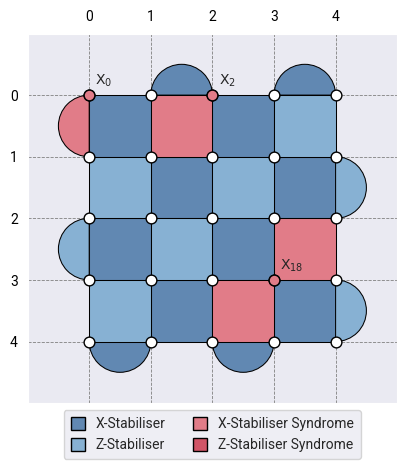

In [22]:
Lattice(5)[np.array([0,2,18])].X().show()

In [10]:
l = Lattice(19)np.setdiff1d(np.arange(19), np.arange(1, 4))
l[1,np.setdiff1d(np.arange(19), np.arange(1, 4))].X().show()

SyntaxError: invalid syntax (586535464.py, line 1)

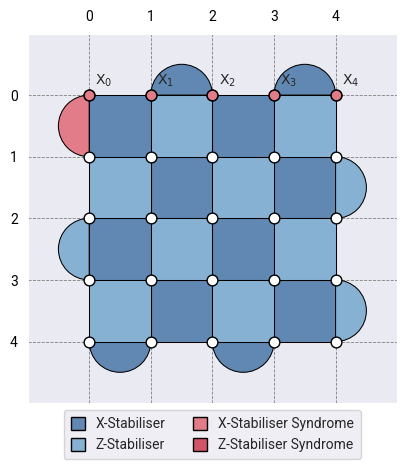

In [27]:
l = Lattice(5)
l[:,np.array([].X()
l.show()

In [13]:
Lattice(5).X([1:22:5]).plot()

SyntaxError: invalid syntax (948452847.py, line 1)

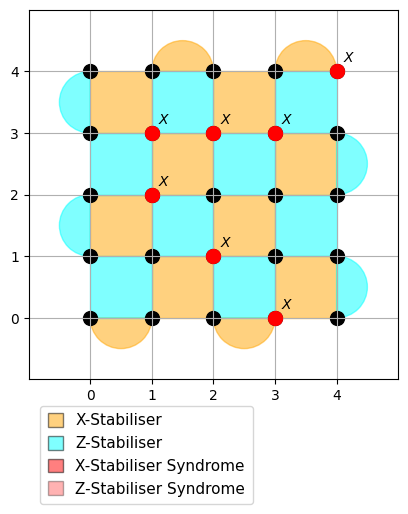

In [16]:
Lattice(5).X(4).X(8).X(7).X(6).X(11).X(17).X(23).plot()

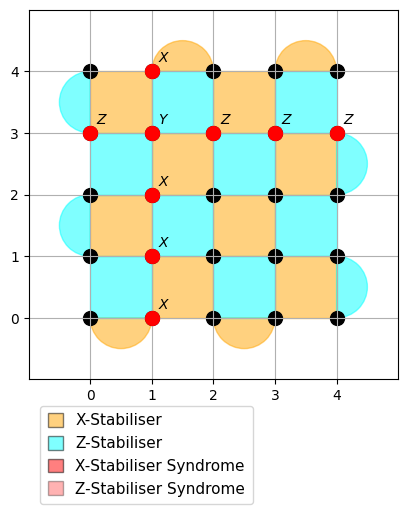

In [17]:
Lattice(5) \
    .Z(5).Z(6).Z(7).Z(8).Z(9) \
    .X(1).X(6).X(11).X(16).X(21) \
    .plot()

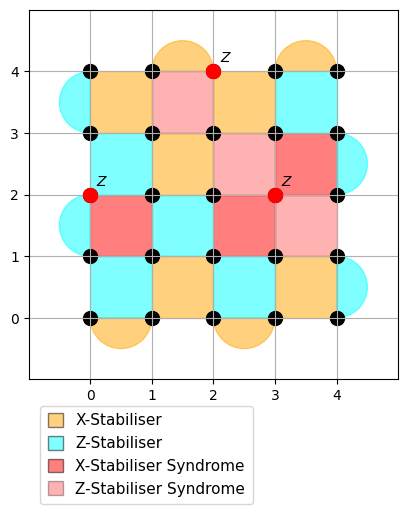

In [18]:
lattice = Lattice(5)
_ = lattice.X(2)
_ = lattice.Z(10)
_ = lattice.Y(13)
lattice.plot()

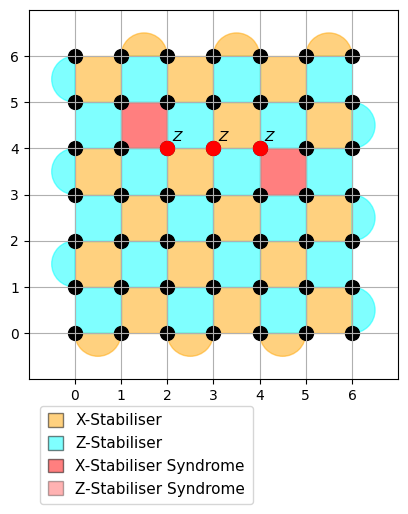

In [19]:
lattice = Lattice(7)
_ = lattice.Z(16).Z(17).Z(18)
lattice.plot()

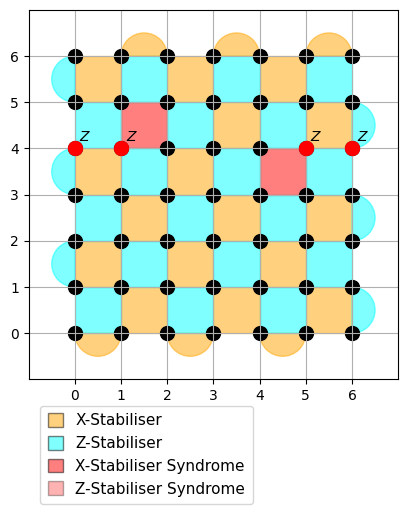

In [20]:
lattice = Lattice(7)
_ = lattice.Z(14).Z(15).Z(19).Z(20)
lattice.plot()

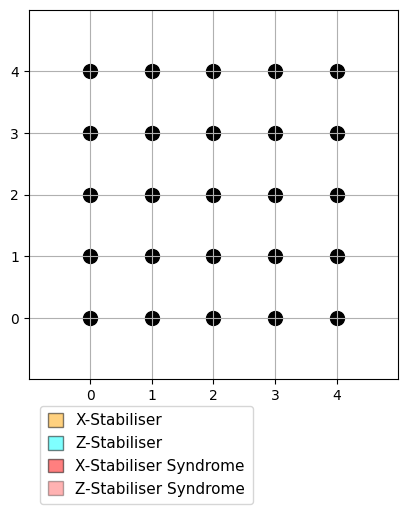

In [21]:
lattice = Lattice(5)
for i in range(25):
    lattice.H(i)
lattice.plot()